<a href="https://colab.research.google.com/github/Zeeshan2012/Hotel-Booking-Analysis-Capstone_project/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### importing all the libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [111]:
# mounting google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
#importing data set
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Booking Analysis-Capstone_project/Hotel Bookings.csv')

In [113]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [114]:
#creating Dataframe copy
df = data.copy()

In [115]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
# number of rows and columns
df.shape

(119390, 32)

In [116]:
# describe() gives the overall descriptive summary of the dataframe

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [117]:
#info method gives the basic info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [118]:
#check the total null values in dataframe
df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [119]:
#agent and company contain maximum number of null values
#drop the maximum null valve column
df.drop(['company','agent'],axis= 1,inplace = True)

In [120]:
df.shape

(119390, 30)

In [121]:
#finding the duplicate value
len(df[df.duplicated()])

32020

In [122]:
#dropping the duplicates values
df = df.drop_duplicates()
df.shape

(87370, 30)

In [123]:
#droppping the NAN value
df = df.dropna()

In [124]:
df.shape

(86914, 30)

## Data Visualization with respect to Hotel Booking Analysis.
#problem statement
#1) Types of hotel and hotels preffered by customer in general?
#2) Whether the guest stay in over a weekend or weekday?
#3) Which is the busiest month of the Hotel?
#4) Which meals were customer prefer the most?
#5) Relation between repeated customer and cancellation.
#6) Countries with Highest bookings.



In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [17]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

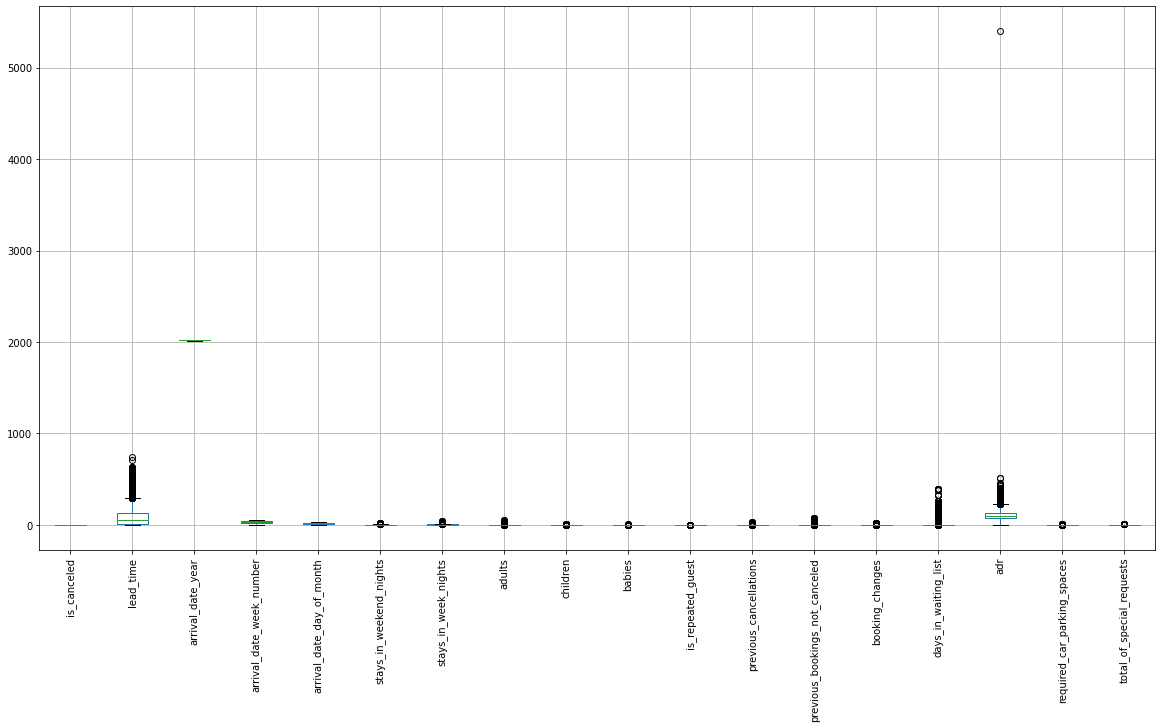

In [19]:
#plotting box plot for finding outliers
plt.figure(figsize=(20,10))
df.boxplot()
plt.xticks(rotation = 90)
plt.show()

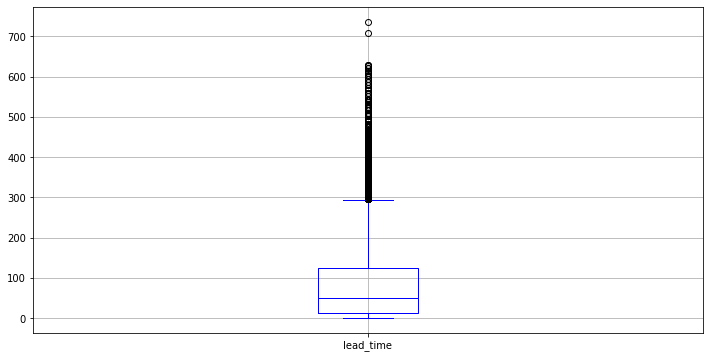

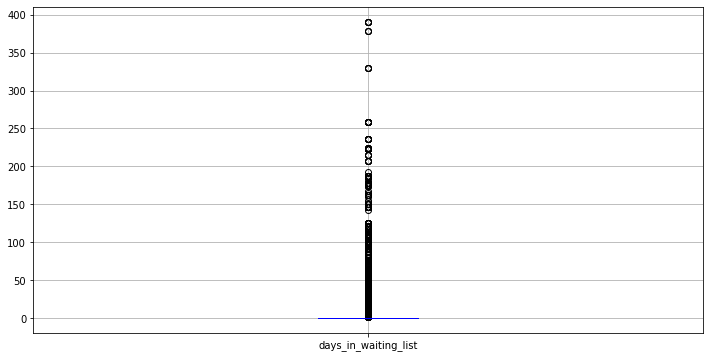

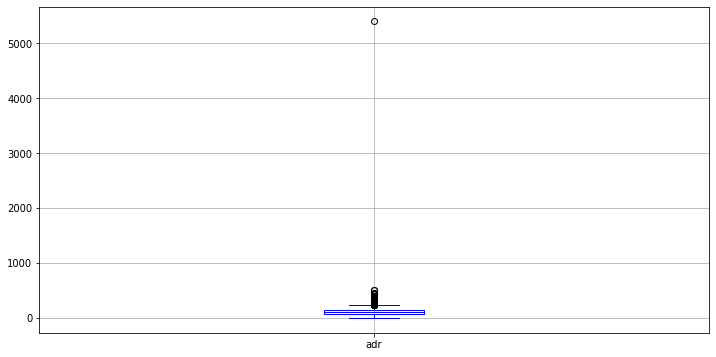

In [20]:
#there are many outliers lets start checking some column 
fig = plt.figure(figsize=(12, 6))
df.boxplot(column = ['lead_time'],color = 'blue')
plt.show()


fig = plt.figure(figsize=(12, 6))
df.boxplot(column = ['days_in_waiting_list'],color = 'blue')
plt.show()

fig = plt.figure(figsize=(12, 6))
df.boxplot(column = ['adr'],color = 'blue')
plt.show()

#We now individually plotted the boxplot for some column to see how many outliers are there in the dataset.

1.   In lead_time and days_in_waiting_list there are so many outliers and
2.   In adr column this seems to have few outliers in the data.



#1)Types of hotel and hotels preffered by customer in general?

In [21]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [22]:
types_of_hotel = df['hotel'].unique() #diff types of hotel
print(f'types of hotel are{types_of_hotel}')
hotel_count = df['hotel'].value_counts() #hotels count
print(hotel_count)

types of hotel are['Resort Hotel' 'City Hotel']
City Hotel      53404
Resort Hotel    33510
Name: hotel, dtype: int64


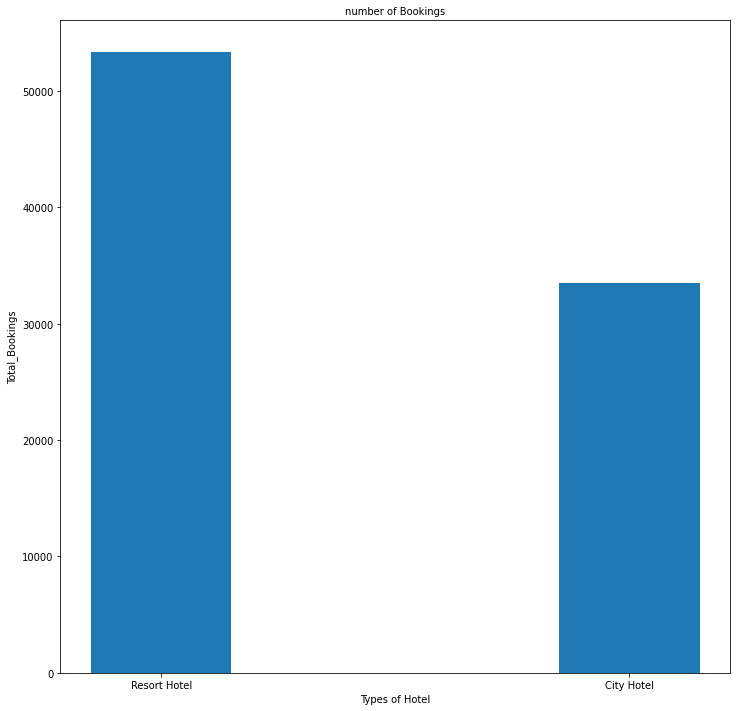

In [23]:
fig = plt.figure(figsize=(12, 12))
plt.bar(types_of_hotel , hotel_count , width = 0.3)
plt.title('number of Bookings', size = 10)
plt.xlabel('Types of Hotel', size = 10)
plt.ylabel('Total_Bookings', size = 10)
plt.show()

## conclusion

1.   There are 2 types of Hotel, City Hotel and Resort Hotel
2.   City Hotel Booked around 51000 times
3.   Resort Hotel booked around 31000 times
4.   It means customer prefer City Hotel over Resort Hotel



# 2) Whether the guest stay in over a weekend or weekday?

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [24]:
df[['stays_in_week_nights','stays_in_weekend_nights']]

,stays_in_week_nights,stays_in_weekend_nights
0,0,0
1,0,0
2,1,0
3,1,0
4,2,0
...,...,...
119385,5,2
119386,5,2
119387,5,2
119388,5,2


In [25]:
print(df['stays_in_week_nights'].unique())
print(df['stays_in_weekend_nights'].unique())

[ 0  1  2  3  4  5 11  8 10  6  7 15  9 12 33 20 14 16 21 13 30 19 24 40
 22 25 17 32 26 18 34 35 41]
[ 0  1  2  4  3  6 13  8  5  7 12  9 16 10 14]


Text(0.5, 1.0, 'Stay on week nights')

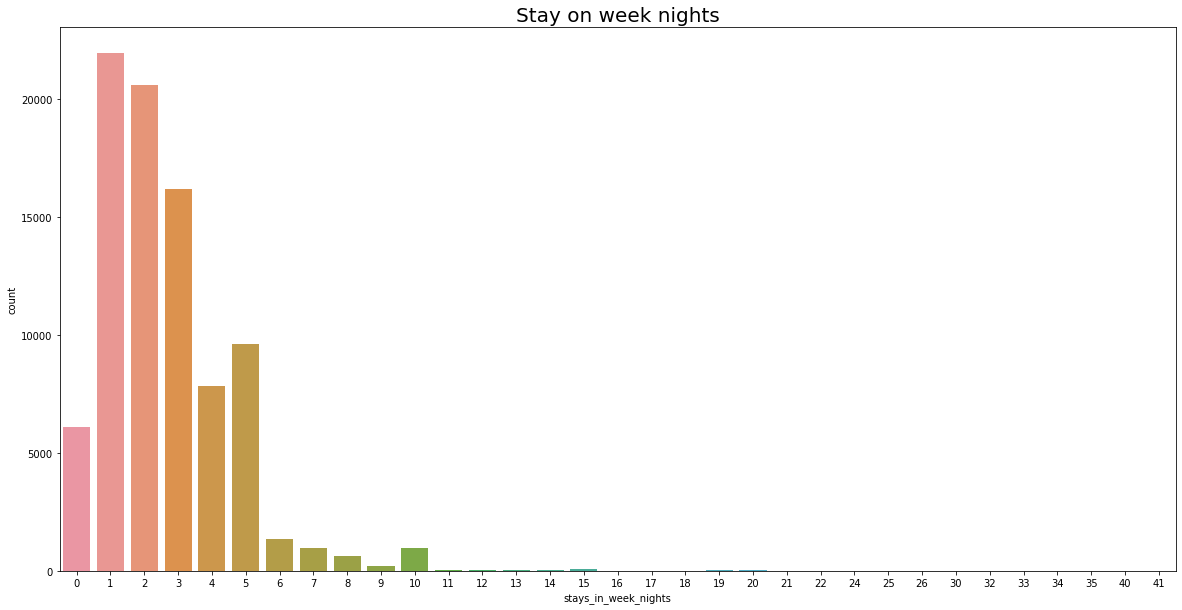

In [26]:
plt.figure(figsize = (20,10))
sns.countplot(data=df, x='stays_in_week_nights').set_title('Stay on week nights', fontsize = 20)

Text(0.5, 1.0, 'Stay on weekend nights')

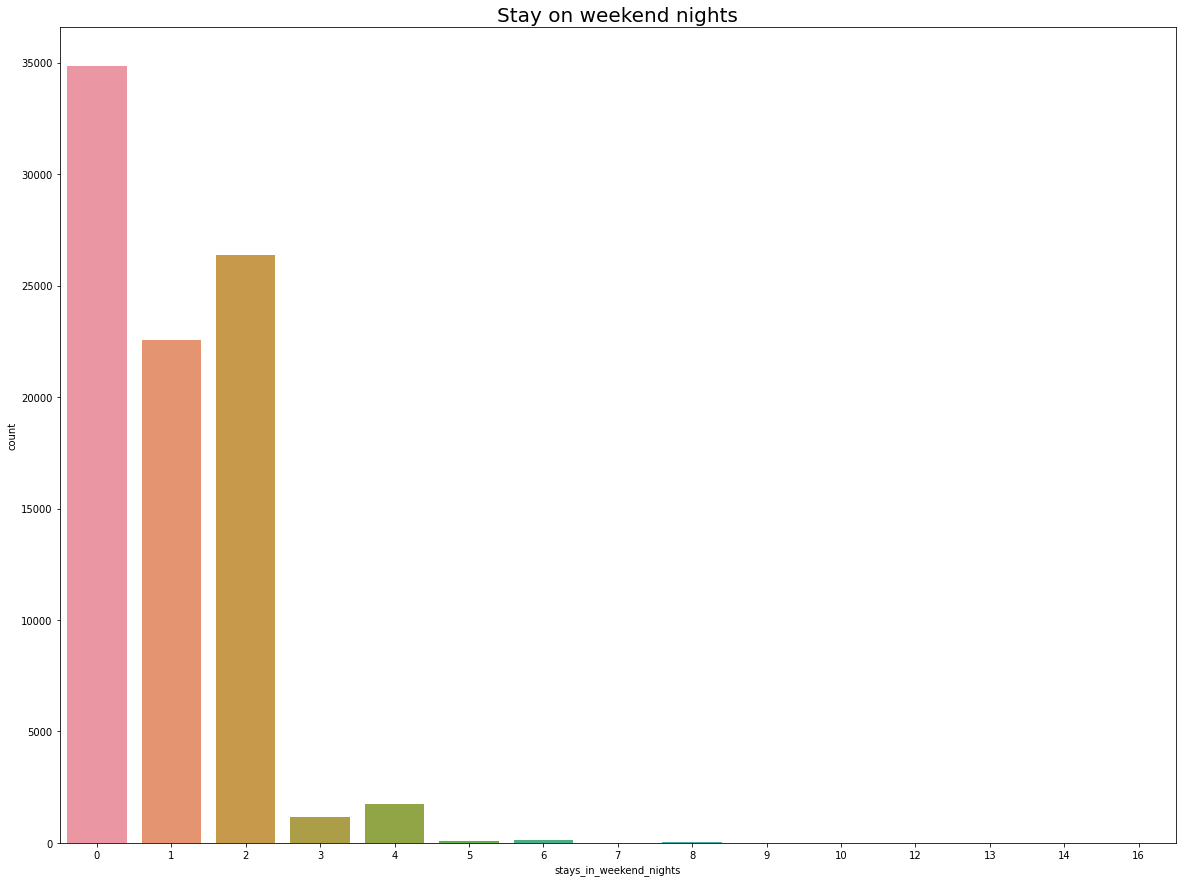

In [27]:
plt.figure(figsize = (20,15))
sns.countplot(data=df, x='stays_in_weekend_nights').set_title('Stay on weekend nights', fontsize = 20)

# conclusion
    

1.   From both graph we can say majority of the customer stays over the  item weekday's night.
2.   Most of the guest stay in weekdays for around 1,2,3,4 and 5 nights and,
3.   Most of the guest stay in weekends for 0,1 and 2 nights respectively.




# 3) Which is the busiest month of the Hotel?

In [28]:
df['arrival_date_month'].value_counts()

August       11229
July         10020
May           8341
April         7869
June          7752
March         7457
October       6883
September     6657
February      6040
December      5080
November      4950
January       4636
Name: arrival_date_month, dtype: int64

Text(0.5, 1.0, 'Monthly_count')

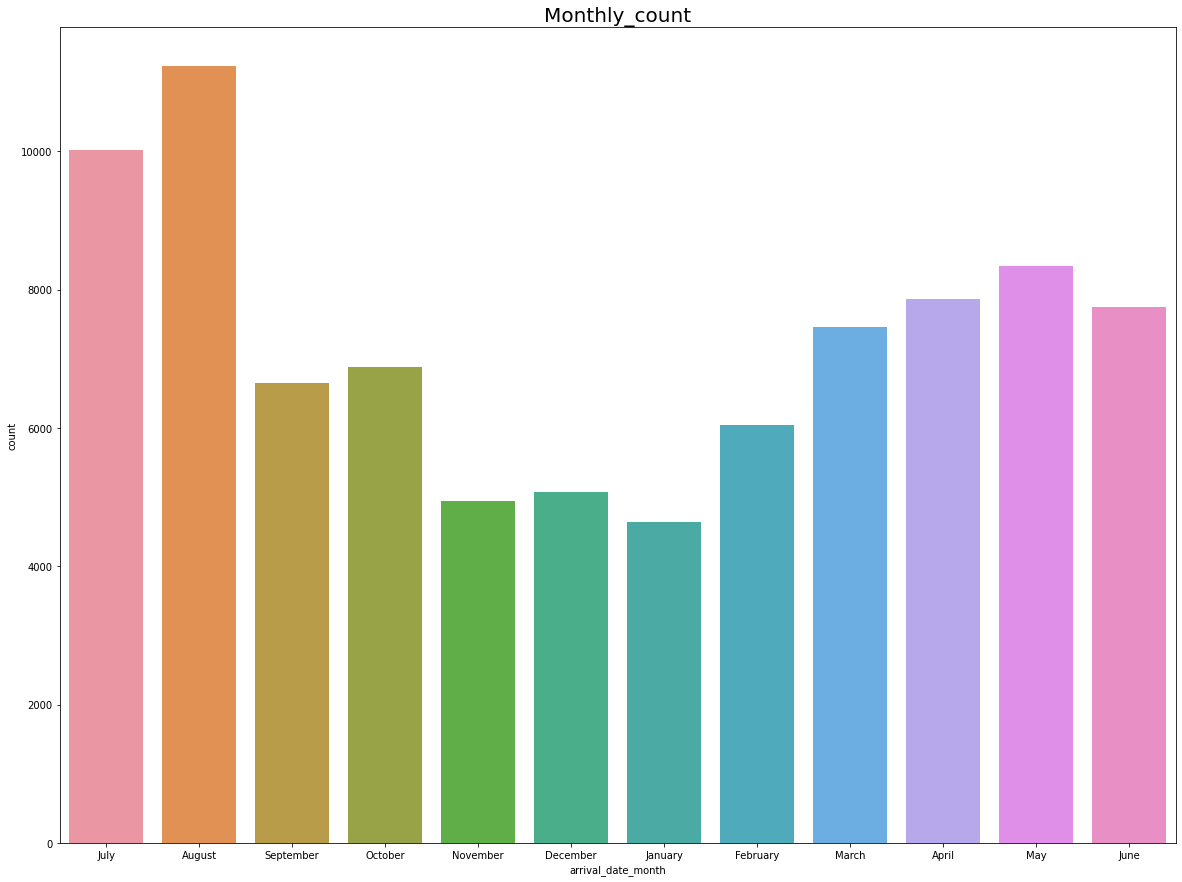

In [29]:
plt.figure(figsize = (20,15))
sns.countplot(data=df, x='arrival_date_month').set_title('Monthly_count', fontsize = 20)

In [31]:
# busy month of hotel booking
busy_month = df.groupby(['arrival_date_month','hotel']).size().unstack()

In [34]:
busy_month.head().reset_index()

hotel,arrival_date_month,City Hotel,Resort Hotel
0,April,5077,2792
1,August,6586,4643
2,December,3013,2067
3,February,3604,2436
4,January,2730,1906


<Figure size 720x576 with 0 Axes>

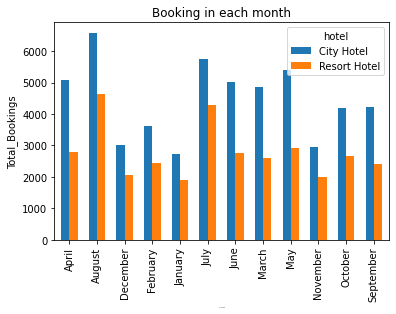

In [44]:
fig = plt.figure(figsize=(10, 8))
busy_month.plot.bar(title='Booking in each month',width = 0.6)
plt.xlabel('arrival date', size = 1)
plt.ylabel('Total_Bookings', size = 10)
plt.show()

# conclusion


 and thatswhy August, July and May is called the busiest month of the year.

1.   From above graph we can say that in the month of August, July and May the number of bookings are highest for city hotel.
2.   In Resort as well, the number of bookings are highest in the month of August ,July and May



# 4) Which meals were customer prefer the most?

In [56]:
print(df['meal'].value_counts()) #counts
df['meal'].value_counts(normalize = True)*100 #value is %

BB           67540
SC            9473
HB            9054
Undefined      488
FB             359
Name: meal, dtype: int64


BB           77.709000
SC           10.899280
HB           10.417194
Undefined     0.561475
FB            0.413052
Name: meal, dtype: float64

Text(0.5, 1.0, 'meal count')

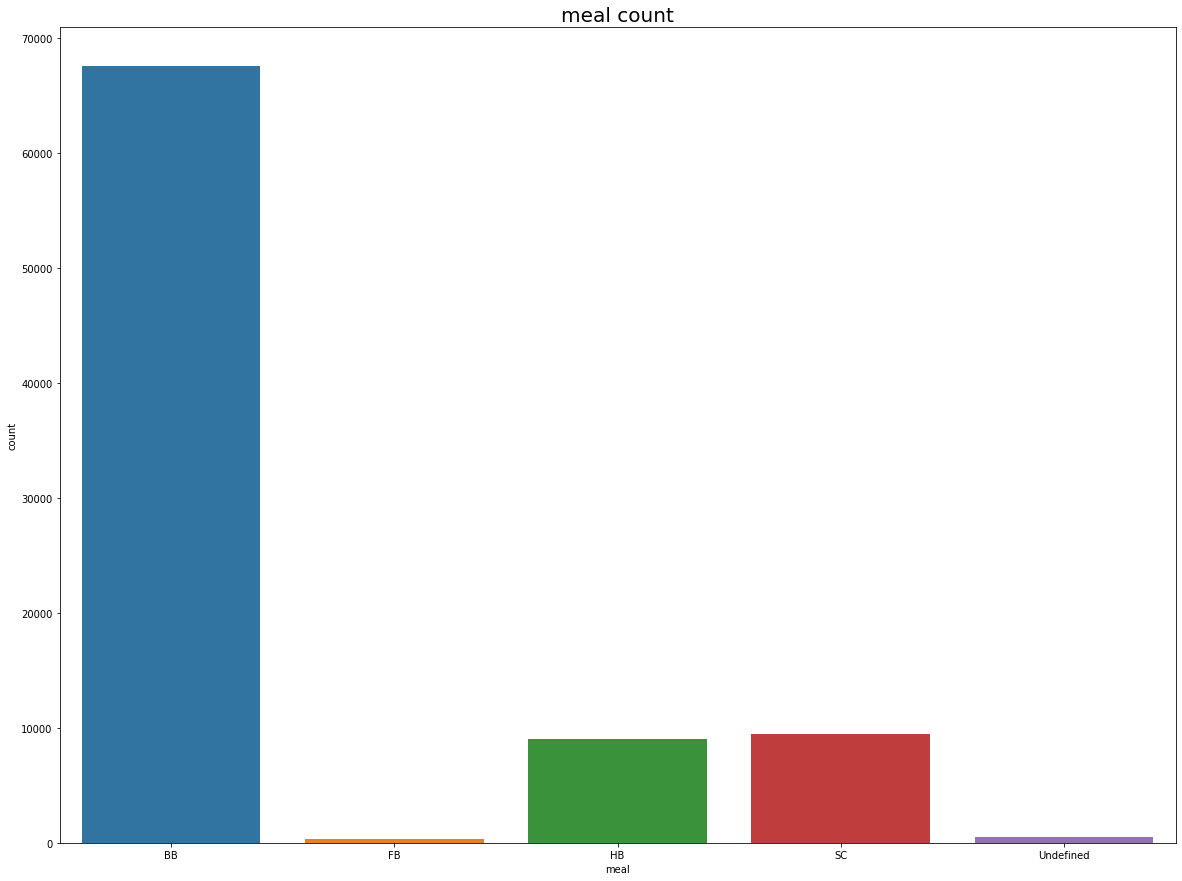

In [51]:
plt.figure(figsize = (20,15))
sns.countplot(data=df, x='meal').set_title('meal count', fontsize = 20)

# conclusion


1.   By seeing graph we can clearly say that most preferrable meal BB i.e Bed and Breakfast with approximate 77%
2.   SC(Super Combo),HB(Half Baked) are on second position
3.   FB i.e Full Breakfast is Very less preferrable meal is and Undefined i.e no meal package.

# 5) Relation between repeated customer and cancellation.

In [109]:
df.columns

AttributeError: ignored

In [102]:
df['is_canceled'].unique()

AttributeError: ignored

In [68]:
df['is_canceled'].replace([0,1],['canceled','not_canceled'],inplace = True)
df['is_canceled'].unique()

array(['canceled', 'not_canceled'], dtype=object)

In [99]:
df['is_repeated_guest'].unique()

AttributeError: ignored

In [94]:
# again the same step by replacing 1,0 of is_canceled and is_repeated_guest to string values.
df['is_canceled'].replace([1,0], ['canceled', 'not_canceled'], inplace = True)
df['is_repeated_guest'].replace([1,0], ['repeated', 'not_repeated'], inplace = True)

AttributeError: ignored

<Figure size 864x576 with 0 Axes>

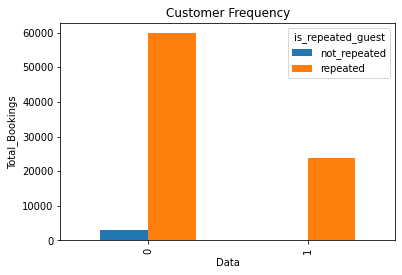

In [84]:
fig = plt.figure(figsize=(12, 8))
df.plot.bar(title='Customer Frequency',width = 0.6)
plt.xlabel('Data', size = 10)
plt.ylabel('Total_Bookings', size = 10)
plt.show()

Text(0.5, 1.0, 'Relation between repeated customer and cancellation')

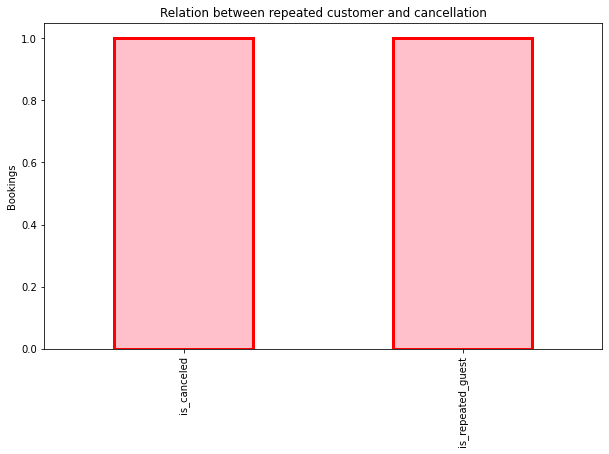

In [88]:
df=df.groupby(['is_canceled','is_repeated_guest']).size()
df.plot(kind='bar', color ='pink', edgecolor ='red', lw = 3, figsize = (10,6));
plt.ylabel('Bookings')
plt.title('Relation between repeated customer and cancellation')

# 6) Countries with Highest bookings.

In [126]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [134]:
Booking = df['country'].value_counts()[0:15].reset_index().rename(columns = {'index':'country' , 'country':'booking_counts'}) #arrange as per understanding
Booking #we will first 15

,country,booking_counts
0,PRT,27436
1,GBR,10431
2,FRA,8837
3,ESP,7250
4,DEU,5385
5,ITA,3065
6,IRL,3016
7,BEL,2081
8,BRA,1993
9,NLD,1911


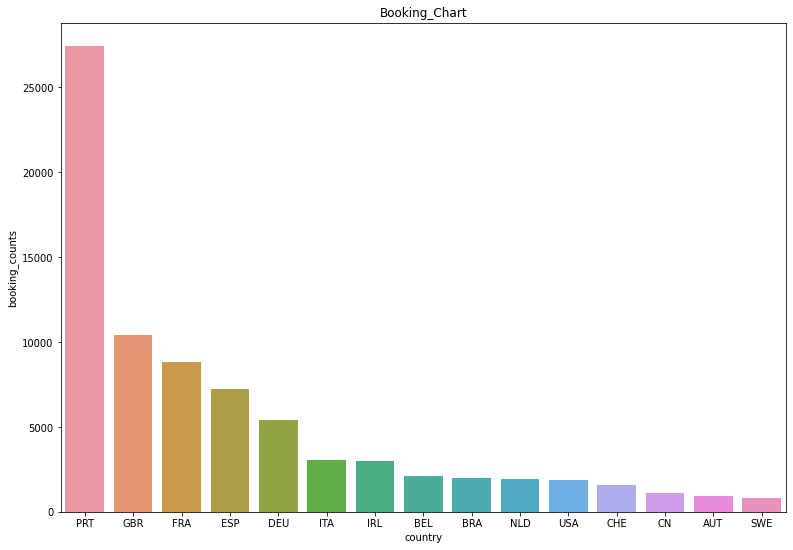

In [143]:
plt.figure(figsize=(13,9))
sns.barplot(x="country", y="booking_counts", data=Booking).set(title='Booking_Chart')
plt.show()